<a href="https://colab.research.google.com/github/douglaseaf15/Livro-Oreilly-notebooks-/blob/master/Modelos_de_treinamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equação normal  $$ \hat\theta  = {(X X^T)^{-1}}X^T y$$

In [0]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [0]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [67]:
 theta_best

array([[3.93803601],
       [2.9825528 ]])

In [68]:
 X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.93803601],
       [9.90314161]])

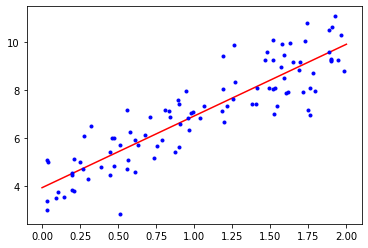

In [69]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

# Usando o modelo pronto do Scikit-Learn

In [70]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([3.93803601]), array([[2.9825528]]))

In [71]:
lin_reg.predict(X_new)

array([[3.93803601],
       [9.90314161]])

In [72]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd


array([[3.93803601],
       [2.9825528 ]])

In [73]:
np.linalg.pinv(X_b).dot(y)

array([[3.93803601],
       [2.9825528 ]])

#Batch gradient descent

In [0]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
 gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
 theta = theta - eta * gradients


In [75]:
theta


array([[3.93803601],
       [2.9825528 ]])

# Stochastic Gradient Descent


In [0]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
 return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
 for i in range(m):
  random_index = np.random.randint(m)
  xi = X_b[random_index:random_index+1]
  yi = y[random_index:random_index+1]
  gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
  eta = learning_schedule(epoch * m + i)
  theta = theta - eta * gradients

In [77]:
theta

array([[3.98458797],
       [2.98495103]])

#Utilizando o Scikit-learn


In [78]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [79]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.88817962]), array([2.97699651]))

#Polynomial Regression

In [0]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [81]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]


array([0.17037034, 0.02902605])

# Curvas de aprendizado

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
 train_errors, val_errors = [], []
 for m in range(1, len(X_train)):
  model.fit(X_train[:m], y_train[:m])
  y_train_predict = model.predict(X_train[:m])
  y_val_predict = model.predict(X_val)
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
  val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

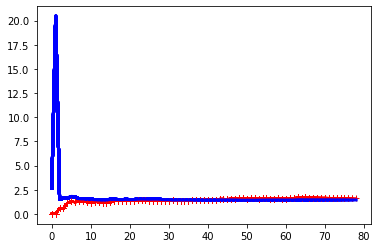

In [92]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

# Usando agora um polinômio de grau 10

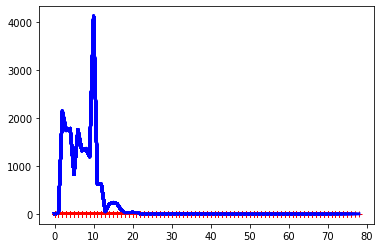

In [93]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("lin_reg", LinearRegression()),
 ])
plot_learning_curves(polynomial_regression, X, y)


# Trade-off entre Bias e variância

#Regularização de modelos lineares

# Para modelos lineares uma forma de regularização pra evitar overfitting é restringir os pesos. Alguns métodos pra realizar essa tarefa serão estudados a seguir.

# Regressão Ridge $$ \hat \theta = (X X^T + \alpha A)^{-1} X^T y$$

In [94]:
 from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [95]:
 ridge_reg.predict([[1.5]])

array([[5.00722733]])

# Utilizando o SGD

In [96]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.99652851])

# Regressão Lasso 

In [97]:
 from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.96620408])

# Elastic Net


In [98]:
 from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.96544788])

# Early Stopping(Voltar depois
)

#Regressão Logística

# Decisions boundaries

In [0]:
from sklearn import datasets
iris = datasets.load_iris()

In [101]:
 list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [0]:
 X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [124]:
X.shape

(150, 1)

In [125]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

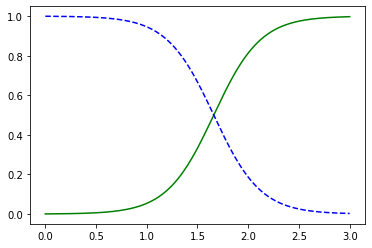

In [131]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
# + more Matplotlib code to make the image look pretty

In [133]:

log_reg.predict([[1.7], [1.5]])#Em aproximadamente 1.6 há uma fronteira, se a a largura dá pétala for maior que esse valor a flor é iris virginica, se não, não é.


array([1, 0])

#Entropia cruzada

In [134]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
 softmax_reg.predict([[5, 2]])

array([2])

In [135]:
softmax_reg.predict_proba([[5, 2]])


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])